# Image classification using Convolution Neural Network and Transfer Learning

### Transfer learning consists of taking features learned on one problem, and leveraging them on a new, similar problem. For instance, features from a model that has learned to identify racoons may be useful to kick-start a model meant to identify tanukis.
https://keras.io/guides/transfer_learning/

- Transfer learning is usually done for tasks where your dataset has too little data to train a full-scale model from scratch.

- The most common incarnation of transfer learning in the context of deep learning is the following workflow:

 - Take layers from a previously trained model.
 - Freeze them, so as to avoid destroying any of the information they contain during future training rounds.
 - Add some new, trainable layers on top of the frozen layers. They will learn to turn the old features into predictions on a new dataset.
 - Train the new layers on your dataset.

#### Freezing layers: understanding the trainable attribute
Layers & models have three weight attributes:
- weights is the list of all weights variables of the layer.
- trainable_weights is the list of those that are meant to be updated to minimize the loss during training.
- non_trainable_weights is the list of those that aren't meant to be trained. Typically they are updated by the model during the forward pass.
- https://keras.io/api/applications/

### VGG16 Model
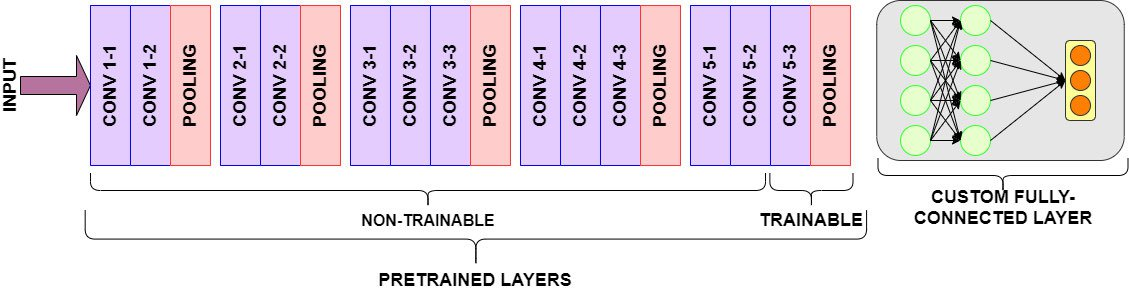

## 1. Importing library

In [1]:
#!pip install numpy==1.23.1

In [4]:
import tensorflow as tf
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D,GlobalAveragePooling2D
from keras.layers import Activation, Dropout, BatchNormalization, Flatten, Dense, AvgPool2D,MaxPool2D
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import VGG16
from keras.models import Sequential, Model
from keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2

In [5]:
from keras.applications.vgg16 import VGG16, preprocess_input

In [3]:
DATASET_DIR = os.listdir("signs") 
DATASET_DIR

['handicap sign', 'stop sign', 'us speed limit sign', 'yield sign']

In [4]:
labels=['handicap sign', 'stop sign', 'us speed limit sign', 'yield sign']

In [5]:

DIR = "signs" # path
link = []
for label in labels:
    path = os.path.join(DIR, label) # combine path and labels
    link.append(path) # append in link
print(link)


for i in range(len(link)):
    new = os.listdir(link[i])
    i+=1
    print(f"length : {len(new)}") # each folder total image count 

['signs\\handicap sign', 'signs\\stop sign', 'signs\\us speed limit sign', 'signs\\yield sign']
length : 1011
length : 1000
length : 1232
length : 1079


In [6]:
IMG_SIZE = 224 # image size

data = [] 

def get_data(data_dir):
    for category in labels:
        path = os.path.join(data_dir, category) #combine path
        class_num = labels.index(category) # index no of labels
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR) # color image array
                resized_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) # resize
                data.append([resized_array, class_num])
            except Exception as e: # exception
                print(e)
    return data 

In [7]:
data=get_data("signs/")

OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'

OpenCV(4.8.0) D:\a\ope

In [8]:
# separate item and label
X = []
y = []
for item, label in data:
    X.append(item)
    y.append(label)

In [9]:
X = np.array(X) / 255 # Normaliation( Now the array will remain 0-1)
y = np.array(y)

### LabelBinarizer is a technique used to convert categorical labels into binary vectors

In [10]:
from sklearn.preprocessing import LabelBinarizer # LabelBinarizer
label_binarizer = LabelBinarizer()
y = label_binarizer.fit_transform(y)

In [11]:
y

array([[1, 0, 0, 0],
       [1, 0, 0, 0],
       [1, 0, 0, 0],
       ...,
       [0, 0, 0, 1],
       [0, 0, 0, 1],
       [0, 0, 0, 1]])

### Splitting the data into training and test set


In [12]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y, 
                                                    test_size=0.20, 
                                                    random_state=42
                                                   )

### Transfer learning
https://paperswithcode.com/dataset/imagenet

In [13]:
base_model = VGG16(weights='imagenet', 
                   include_top=False, 
                   input_shape=(IMG_SIZE,IMG_SIZE, 3))

# Freeze the base_model layers so that they are not trained during fine-tuning
for layer in base_model.layers:
    layer.trainable = False

In [14]:
model = Sequential()
model.add(base_model)
model.add(GlobalAveragePooling2D())
model.add(Dense(128, activation='relu'))
model.add(Dense(4, activation='softmax')) # num_classes is the number of sign classes

In [15]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 global_average_pooling2d (  (None, 512)               0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 128)               65664     
                                                                 
 dense_1 (Dense)             (None, 4)                 516       
                                                                 
Total params: 14780868 (56.38 MB)
Trainable params: 66180 (258.52 KB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [16]:

model.compile(loss="categorical_crossentropy",
              optimizer="adam", 
              metrics=["accuracy"])

In [17]:
tf.keras.utils.plot_model(model, to_file='model1.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [18]:
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [19]:
history = model.fit(x_train, y_train, 
                    epochs=10, validation_data=(x_test, y_test), 
                    batch_size=32, callbacks = [early_stopping]) # training part with 10 epochs
# callbacks=[early_stopping]

Epoch 1/10
108/108 [==============================] - 410s 4s/step - loss: 0.8843 - accuracy: 0.7101 - val_loss: 0.5540 - val_accuracy: 0.8149
Epoch 2/10
108/108 [==============================] - 464s 4s/step - loss: 0.3431 - accuracy: 0.9307 - val_loss: 0.2521 - val_accuracy: 0.9558
Epoch 3/10
108/108 [==============================] - 432s 4s/step - loss: 0.1822 - accuracy: 0.9717 - val_loss: 0.1678 - val_accuracy: 0.9744
Epoch 4/10
108/108 [==============================] - 466s 4s/step - loss: 0.1216 - accuracy: 0.9808 - val_loss: 0.1070 - val_accuracy: 0.9814
Epoch 5/10
108/108 [==============================] - 416s 4s/step - loss: 0.0873 - accuracy: 0.9860 - val_loss: 0.0916 - val_accuracy: 0.9802
Epoch 6/10
108/108 [==============================] - 440s 4s/step - loss: 0.0651 - accuracy: 0.9898 - val_loss: 0.0752 - val_accuracy: 0.9849
Epoch 7/10
108/108 [==============================] - 418s 4s/step - loss: 0.0535 - accuracy: 0.9924 - val_loss: 0.0675 - val_accuracy: 0.9872

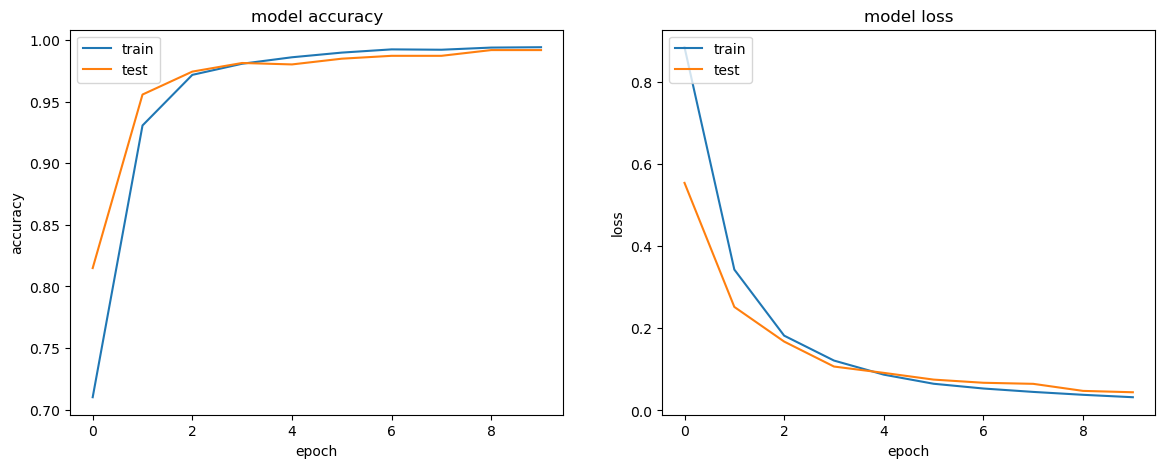

In [20]:
fig , ax = plt.subplots(1,2, figsize=(14,5))
ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('model accuracy')
ax[0].set_ylabel('accuracy')
ax[0].set_xlabel('epoch')
ax[0].legend(['train', 'test'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('model loss')
ax[1].set_ylabel('loss')
ax[1].set_xlabel('epoch')
ax[1].legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
print("training_accuracy", history.history['accuracy'][-1])
print("validation_accuracy", history.history['val_accuracy'][-1])

training_accuracy 0.9941725134849548
validation_accuracy 0.9918509721755981


In [22]:
score = model.evaluate(x_test, y_test)
model.save("cnn10.model") # save model

27/27 [==============================] - 71s 3s/step - loss: 0.0444 - accuracy: 0.9919
INFO:tensorflow:Assets written to: cnn10.model\assets


INFO:tensorflow:Assets written to: cnn10.model\assets


## 5. Labeling & Prediction

# Confusion matrix: It is a matrix of size 2×2 for binary classification with actual values on one axis and predicted on another.

In [23]:
y_test_inv = label_binarizer.inverse_transform(y_test)

In [24]:
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)

27/27 [==============================] - 74s 3s/step


In [25]:
classes_x[:5]

array([3, 1, 3, 3, 3], dtype=int64)

In [26]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report

In [27]:
cm=confusion_matrix(y_test_inv,classes_x)

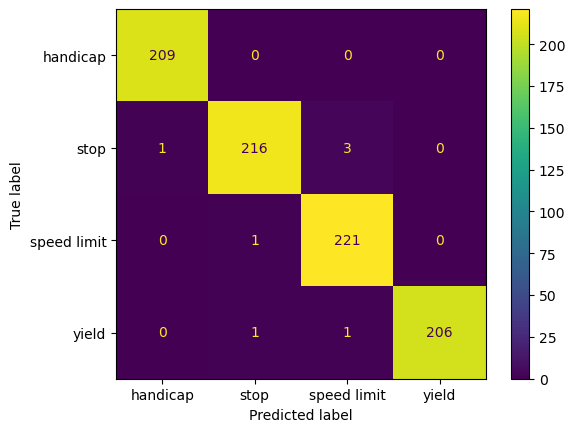

In [29]:
cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, 
                                    display_labels = ['handicap', 'stop', 'speed limit', 'yield'])

cm_display.plot()
plt.show()

In [30]:
print(classification_report(y_test_inv,classes_x))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       0.99      0.98      0.99       220
           2       0.98      1.00      0.99       222
           3       1.00      0.99      1.00       208

    accuracy                           0.99       859
   macro avg       0.99      0.99      0.99       859
weighted avg       0.99      0.99      0.99       859



In [1]:
from tensorflow import keras
model_new = keras.models.load_model('cnn10.model')

In [16]:
from keras.preprocessing import image
test_image = image.load_img('prediction/stopsign1.jpg',
                           target_size=(224,224))

In [17]:
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)

In [18]:
predict_x = model_new.predict(test_image/255.0) 
classes_x = np.round(predict_x).astype(int)

1/1 [==============================] - 0s 143ms/step


In [19]:
classes_x

array([[0, 1, 0, 0]])

In [20]:
handicap = np.array([1,0,0,0])
stop = np.array([0,1,0,0])
speed_limit = np.array([0,0,1,0])
yield_sign = np.array([0,0,0,1])

In [22]:
if np.array_equal(classes_x[0], handicap):
    prediction='handicap sign'
elif np.array_equal(classes_x[0], stop):
    prediction='stop sign'
elif np.array_equal(classes_x[0], speed_limit):
    prediction = 'speed limit sign'
else:
    prediction = 'yield sign'
print(prediction)

stop sign
